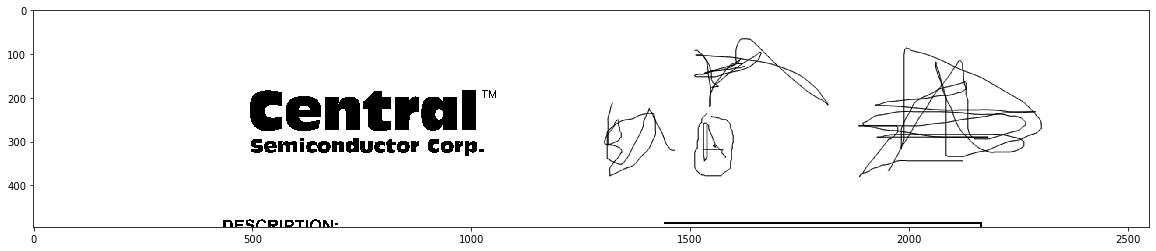

In [1]:
from skimage.metrics import normalized_root_mse
from matplotlib import pyplot as plt
import numpy as np
import pathlib
import time
import cv2
import os

# Increase the figure size.
plt.rc('figure', figsize=(20, 20))

input_dir = 'dataset/'


start = time.time()
filenames = os.listdir(input_dir)
filenames.reverse()
imgs = [cv2.imread(input_dir + filename) for filename in filenames]
end = time.time()

img_load_time = end - start

start = time.time()
for i in range(len(imgs)-1):

	# Extract top 15% of the image.
	img = imgs[i]
	header = img[:int(img.shape[0]*0.15), :]
	plt.imshow(header)



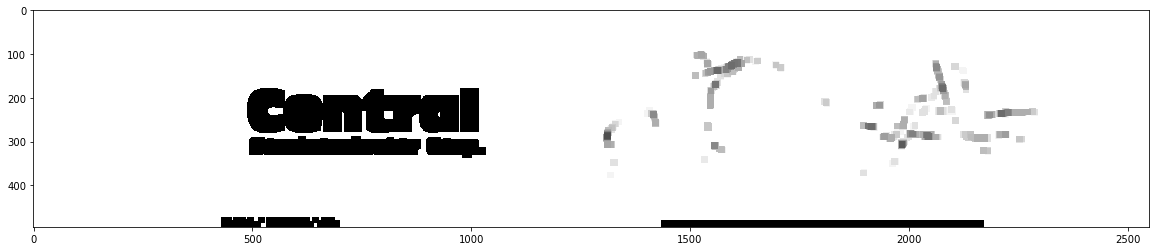

In [2]:
for i in range(len(imgs)-1):


# Perform dilation and erosion to blur the text.
	d_kernel = np.ones((5, 5), np.uint8)
	header = cv2.dilate(header, d_kernel)
	e_kernel = np.ones((15, 15), np.uint8)
	header = cv2.erode(header, e_kernel)

	plt.imshow(header)

	# Use Canny to find edges.
	canny = cv2.Canny(header, 100, 100 * 2)
    

	# Find the contours using edges.
	contours, hierarchy = cv2.findContours(
		canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

	

c:\users\bharath\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if __name__ == '__main__':


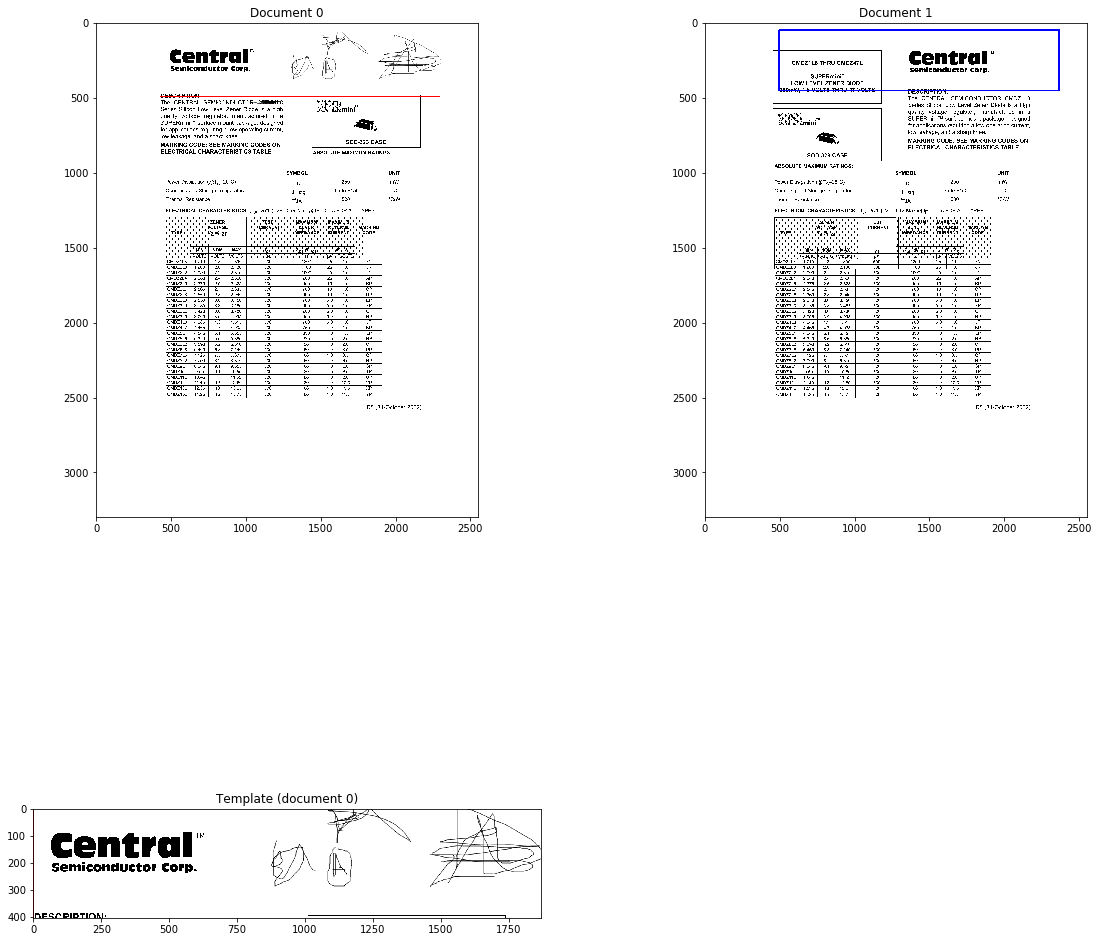

In [3]:
for i in range(len(imgs)-1):


# If no contours were found, skip the image.
	if not contours:
		print(f'{i} -> {i+1}: no match')
		continue

	contours = np.vstack(c for c in contours)
	x, y, w, h = cv2.boundingRect(contours)
	logo = img[y:y+h, x:x+w]
    #plt.show(logo)

    
	cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

	# Extract top 15% of the pair image.
	header2 = imgs[i+1][:int(imgs[i+1].shape[0]*0.15), :]
	plt.imshow(header2)

	# Perform template matching of the matched template with header2.
	match = cv2.matchTemplate(header2, logo, cv2.TM_CCOEFF)
	min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match)

	matched = header2[max_loc[1]:max_loc[1]+h, max_loc[0]:max_loc[0]+w]
	plt.imshow(matched)

	bottom_right = (max_loc[0] + w, max_loc[1] + h)
	cv2.rectangle(imgs[i+1], max_loc, bottom_right, (0, 0, 255), 10)
	plt.imshow(
	imgs[i+1][:int(img.shape[0]*0.15), :])

	plt.subplot(221, title=f'Document {i}')
	plt.imshow(imgs[i])
	plt.subplot(222, title=f'Document {i+1}')
	plt.imshow(imgs[i+1])
	plt.subplot(223, title=f'Template (document {i})')
	plt.imshow(logo)



